#STUDENT NOTEBOOK
   - Student : Kornelia Machnicka
   
Data Science - University of Deusto

##Libraries

Be sure all the needed libraries for the proper execution of the code without errors are included here.

In [ ]:
packages = c("tidyverse", "glue", "knitr", "lubridate", "fastDummies", "class", "caret", "rpart", "arules")
newpack  = packages[!(packages %in% installed.packages()[,"Package"])]
if(length(newpack)) install.packages(newpack)
a=lapply(packages, library, character.only=TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘car

##Exercise 01: Data Integration


Using data in the files *ratings.csv* and *movies.csv*:

**1.** Using the ratings.csv dataset, transform the data so that each row corresponds to a movieId and each column (beyond movieId) corresponds to a userId. Values should be the given rating. Handle missing values by replacing them with NA.


**Explanation:**
*Pivot_wider()* automatically inserts *NA* in places where there is missing data.
For visual clarity, only first ten rows and columns are shown.

In [ ]:
rm(list = ls())

data_ratings = read.csv("./ratings.csv")

datawide = data_ratings %>%
  pivot_wider(id_cols = movieId, names_from = userId, values_from = rating)

knitr::kable(datawide[1:10, 1:10])



| movieId|   1|  2|  3|  4|  5|  6|  7|  8|  9|
|-------:|---:|--:|--:|--:|--:|--:|--:|--:|--:|
|      31| 2.5| NA| NA| NA| NA| NA|  3| NA| NA|
|    1029| 3.0| NA| NA| NA| NA| NA| NA| NA| NA|
|    1061| 3.0| NA| NA| NA| NA| NA| NA| NA| NA|
|    1129| 2.0| NA| NA| NA| NA| NA|  3| NA| NA|
|    1172| 4.0| NA| NA| NA| NA| NA| NA| NA| NA|
|    1263| 2.0| NA| NA| NA| NA| NA| NA| NA| NA|
|    1287| 2.0| NA| NA| NA| NA| NA|  4| NA| NA|
|    1293| 2.0| NA| NA| NA| NA| NA| NA| NA| NA|
|    1339| 3.5| NA| NA| NA| NA| NA| NA| NA| NA|
|    1343| 2.0| NA| NA| NA| NA| NA| NA| NA| NA|

**2.** Merge the movies.csv and ratings.csv datasets. Display the titles of the 10 movies with higher number of votes and the userId of the persons giving votes to more movies.

**Explanation:**

Firstly, *full_join()* is used to merge two datasets. Then we accordingly group both data frames and count occurences of votes given and sort in descending order. As a result the first table shows ten movies with highest numer of votes and the second table shows ten users who gave the most votes.

In [ ]:
data_movies = read.csv("./movies.csv")

result = full_join(data_ratings, data_movies, by = "movieId") %>%
  group_by(movieId) %>%
  summarise(num_votes = n()) %>%
  arrange(desc(num_votes))

user_votes = data_ratings %>%
  group_by(userId) %>%
  summarise(num_votes = n()) %>%
  arrange(desc(num_votes))

knitr::kable(head(result, 10))
knitr::kable(head(user_votes, 10))



| movieId| num_votes|
|-------:|---------:|
|     356|       341|
|     296|       324|
|     318|       311|
|     593|       304|
|     260|       291|
|     480|       274|
|    2571|       259|
|       1|       247|
|     527|       244|
|     589|       237|



| userId| num_votes|
|------:|---------:|
|    547|      2391|
|    564|      1868|
|    624|      1735|
|     15|      1700|
|     73|      1610|
|    452|      1340|
|    468|      1291|
|    380|      1063|
|    311|      1019|
|     30|      1011|

##Exercise 02: Special Data


Using data in *DisneylandReviews.csv*:

**1.** Extract any sequence of characters from the Review_Text column that either contains at least one digit (e.g., "2", "3pm", "10:30am") or is a word written entirely in uppercase (e.g., "WOW", "AMAZING", "BAD"). Create two new columns: one for the extracted sequences containing digits and another for the uppercase words.


**Explanation:**

The expression "\\\b\\\S\*\\\d+\\\S\*\\\b" is used to find words that contain at least one digit.
The expression "\\\b[A-Z]{2,}\\\b" is used to find words written entirely in uppercase.

\b ensures to match complete sequences of characters

\S* finds only non-whitespace characters that will appear zero or more times

\d+ finds digits that will appear one or more times

[A-Z] finds only uppercase letters

{2,} finds at least two uppercase letters in a row

In [ ]:
rm(list = ls())

data = read.csv("./DisneylandReviews.csv")

data_movies = data %>%
   mutate(digits = str_extract_all(Review_Text,"\\b\\S*\\d+\\S*\\b"),
          words = str_extract_all(Review_Text,"\\b[A-Z]{2,}\\b")) %>%
   select(-Rating, -Review_Text, -Year_Month, -Branch, -Reviewer_Location)

knitr::kable(head(data_movies, 20))



| Review_ID|digits                        |words                                                |
|---------:|:-----------------------------|:----------------------------------------------------|
| 670772142|                              |                                                     |
| 670682799|1                             |HK     , AKA    , HK     , HK     , MINUS  , SMILING |
| 670623270|10:30am, 6pm    , 8.5    , 45 |                                                     |
| 670607911|                              |HK, LA                                               |
| 670607296|1                             |                                                     |
| 670591897|                              |VERY                                                 |
| 670585330|                              |                                                     |
| 670574142|1.5days.One                   |                                                     |
| 670571027|2     

**2.** Convert the Year_Month column into a proper datetime format and ensure the data is sorted chronologically. Per month and by branch, calculate the number of "bad reviews" (Rating <= 3) and "good reviews" (Rating > 3) the current plus in the previous two months for each branch (rolling sum). Create line graphs to visualize the % of bad and good reviews per branch.


**Explanation:**

The first part of the code detects only correct expression for *Year_Month*, changes the date into proper date format and sorts chronologically.

The second part of the code calculates numbers of bad and good reviews and rolling sums.

The graph visualizes percent of good and bad reviews for every branch for every year. Rolling values were used to show more stable patterns and trends over time.



| Review_ID| Rating| Year| Month|Branch                |Year_Month |
|---------:|------:|----:|-----:|:---------------------|:----------|
|  94453340|      4| 2010|     3|Disneyland_HongKong   |2010-03-01 |
|  95738397|      5| 2010|     3|Disneyland_Paris      |2010-03-01 |
|  97637597|      5| 2010|     4|Disneyland_California |2010-04-01 |
| 103682309|      2| 2010|     5|Disneyland_HongKong   |2010-05-01 |
| 104424582|      5| 2010|     5|Disneyland_California |2010-05-01 |
|  93079463|      5| 2010|     5|Disneyland_California |2010-05-01 |
|  94826092|      1| 2010|     5|Disneyland_Paris      |2010-05-01 |
| 108866563|      3| 2010|     6|Disneyland_California |2010-06-01 |
| 102414955|      5| 2010|     6|Disneyland_California |2010-06-01 |
| 101173905|      1| 2010|     6|Disneyland_California |2010-06-01 |

`summarise()` has grouped output by 'Year_Month'. You can override using the
`.groups` argument.




|Year_Month |Branch                | Bad_Reviews| Good_Reviews| Rolling_Bad| Rolling_Good|
|:----------|:---------------------|-----------:|------------:|-----------:|------------:|
|2010-03-01 |Disneyland_HongKong   |           0|            1|          NA|           NA|
|2010-03-01 |Disneyland_Paris      |           0|            1|          NA|           NA|
|2010-04-01 |Disneyland_California |           0|            1|          NA|           NA|
|2010-05-01 |Disneyland_California |           0|            2|          NA|           NA|
|2010-05-01 |Disneyland_HongKong   |           1|            0|          NA|           NA|
|2010-05-01 |Disneyland_Paris      |           1|            0|          NA|           NA|
|2010-06-01 |Disneyland_California |           2|            3|           2|            6|
|2010-06-01 |Disneyland_Paris      |           0|            3|           1|            4|
|2010-07-01 |Disneyland_California |           1|            3|           3|            

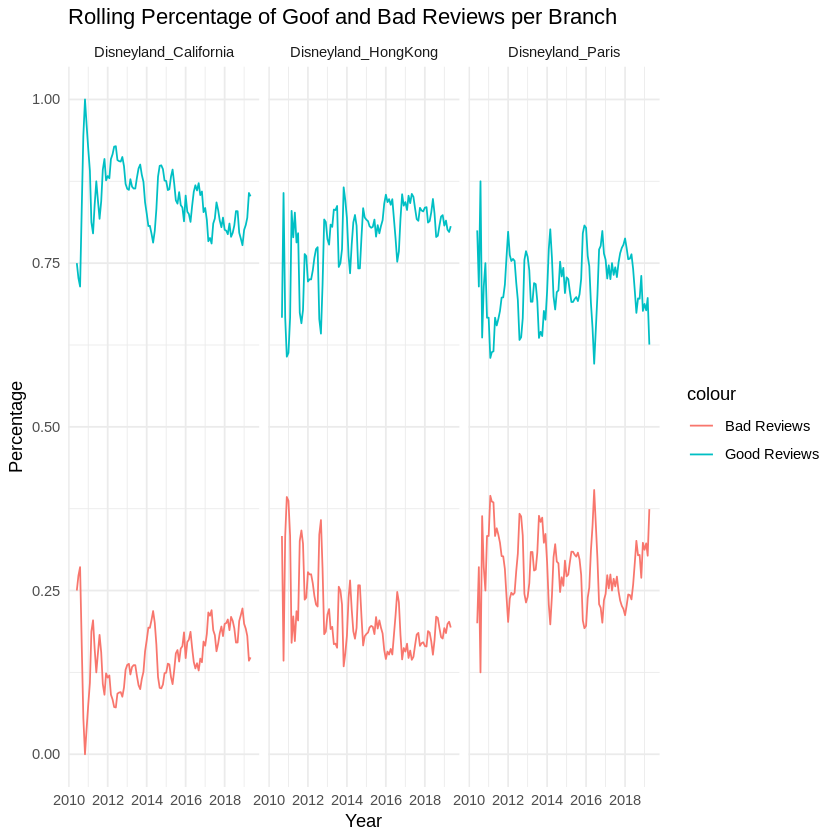

In [ ]:
data = read.csv("./DisneylandReviews.csv")

data = data %>%
  filter(str_detect(Year_Month,"[0-9]{4}-[0-9]{1,2}")) %>%
  separate(Year_Month, into = c("Year", "Month"), "-") %>%
  mutate(Year = as.numeric(Year),
         Month = as.numeric(Month),
         Year_Month = make_date(Year, Month)) %>%
  arrange(Year_Month) %>%
  select(-Review_Text, -Reviewer_Location)

knitr::kable(head(data, 10))


data_aggreagated = data %>%
  group_by(Year_Month, Branch) %>%
  summarise(Bad_Reviews = sum(Rating <= 3, na.rm = T),
            Good_Reviews = sum(Rating >3, na.rm = T)) %>%
  ungroup() %>%
  group_by(Branch) %>%
  mutate(Rolling_Bad = Bad_Reviews + lag(Bad_Reviews, 1) + lag(Bad_Reviews, 2),
         Rolling_Good = Good_Reviews + lag(Good_Reviews, 1) + lag(Good_Reviews, 2))

knitr::kable(head(data_aggreagated, 20))


data_aggreagated = data_aggreagated %>%
  filter(!is.na(Rolling_Bad), !is.na(Rolling_Good)) # taking into consideration only non-missing values

ggplot(data_aggreagated, aes(x = Year_Month)) +
  geom_line(aes(y = Rolling_Bad / (Rolling_Bad + Rolling_Good), color = "Bad Reviews")) +
  geom_line(aes(y = Rolling_Good / (Rolling_Bad + Rolling_Good), color = "Good Reviews")) +
  facet_wrap(~Branch) +
  labs(title = "Rolling Percentage of Goof and Bad Reviews per Branch",
       x = "Year",
       y = "Percentage") +
  theme_minimal()

##Exercise 03: Supervised Machine Learning

You must use data in *Obesity prediction.csv* file to:

**1.** Prepare the dataset by dummifying all non-numerical columns and normalizing the data. Perform cross-validation to identify the optimal k value for KNN. Test values of k from 1 to 20, and for each k, use cross-validation process with 5 folds. For each fold, calculate the classification error on the validation set. Average the errors for each k, and identify the value of k with the lowest average error. Report the optimal k and the corresponding error rate.


**Explanation:**

The first part of the code dummifies non-numerical columns and normalizes the dataset using min-max normalization.

The second part performs cross-validation. For each k value, it obtains prediction for each fold and calculates the classification error. For each k values the average error is calculated (mean) and at last minimal error and corresponding k value is found.

In [ ]:
rm(list = ls())

data = read.csv("./Obesity prediction.csv")
columns_dummy = c("Gender", "family_history", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "Obesity")
columns_normal = c("Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE")

for(col in columns_dummy) {
  data[[col]] = as.factor(data[[col]])
}

# dummifying and normalizing
data = data %>%
  dummy_cols(select_columns = columns_dummy) %>%
  select(-Gender, -CAEC, -CALC, -MTRANS, -family_history, -FAVC, -SMOKE, -SCC)

for(col in columns_normal) {
  min_val = min(data[[col]], na.rm = T)
  max_val = max(data[[col]], na.rm = T)

  data[[col]] = (data[[col]] - min_val) / (max_val - min_val)
}

# cross-validation
folds = createMultiFolds(data$Obesity, k = 5, times = 1)
k_values = 1:20
k_errors = c()

for(k in k_values) {

  fold_errors = c()

  for (i in 1:length(folds)) {
    data.tra = data[ folds[[i]], ]
    data.tst = data[-folds[[i]], ]

    predictionknn = knn(data.tra %>% select(-Obesity),
                        data.tst %>% select(-Obesity),
                        data.tra$Obesity,
                        k = k)

    accuracyknn = confusionMatrix(predictionknn, data.tst$Obesity)$overall[[1]]
    classification_error = 1 - accuracyknn
    fold_errors[i] = classification_error
  }

  k_errors[k] = mean(fold_errors)
}

min_error = min(k_errors)
optimal_k = which.min(k_errors)

glue("Optimal k: ", optimal_k, "\n")
glue("Corresponding error rate: ", min_error, "\n")

Optimal k: 4

Corresponding error rate: 0.0118474278803894

**2.** Split the dataset into training (80%) and testing (20%) sets. Train a decision tree model to predict the Obesity class using the training set. Use the model to predict the test set and evaluate its performance using a confusion matrix. Calculate per-class precision and recall. An identify the easiest and hardest class to predict by the model.

**Explanation:**

The first part of the code trains a decision tree, finds predictions and obtains the confusion matrix.

The second part of the code calculates precisions and recalls. The easiest and hardest class to predict is obtained based on the F1-Score.

F1-Score is a metric that combines recall and precision. (source: https://www.quarkml.com/2022/05/precision-and-recall-in-classification.html)

In [ ]:
rm(list = ls())

data = read.csv("./Obesity prediction.csv")
columns_factor = c("Gender", "family_history", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "Obesity")

for(col in columns_factor) {
  data[[col]] = as.factor(data[[col]])
}

index = createDataPartition(data$Obesity, p = 0.80, times = 1, list=FALSE)
data.tra = data[ index,]
data.tst = data[-index,]

model = rpart(Obesity~., data = data.tra, method = "class")
predictions = predict(model, data.tst, type = "class")

cm = confusionMatrix(predictions, data.tst$Obesity)$table


names = colnames(cm)
precisions = c()
recalls = c()
f1_scores = c()

for(name in names) {
  tp = cm[name,name]
  row_sum = sum(cm[name,])
  col_sum = sum(cm[,name])

  precision = tp / row_sum
  recall = tp / col_sum
  f1_score = 2 * (precision * recall) / (precision + recall)

  precisions[name] = precision
  recalls[name] = recall
  f1_scores[name] = f1_score
}

easiest = names(which.max(f1_scores))
hardest = names(which.min(f1_scores))

glue("Easiest to predict: ", easiest, "\n")
glue("Hardest to predict: ", hardest, "\n")

Easiest to predict: Obesity_Type_III

Hardest to predict: Normal_Weight

##Exercise 04: Unsupervised Machine Learning


Using the *volpre2019.csv* data:

**1.** Extract the first two characters from Codigo Variedad to create a new column representing the product family. Calculate the percentage of each product family sent by each Descripcion Origen. Cluster the Descripcion Origen into groups using K-means based on these percentages. Present the centroid of each cluster, showing the percentage distribution of product families for each cluster. Provide a clear interpretation of the clusters.

**Explanation:**

The first part of the code deals with calculation of percentages for product families. Since *kmeans()* needs numeric data, in the second part of the code, data is prepared with the use of *pivot_wider()*. The last part of the code handles clustering operation.

In [ ]:
rm(list = ls())

data = read.csv("./volpre2019.csv", sep = ";", dec = ",")

data = data %>%
  mutate(Family = str_extract(Codigo.Variedad, "\\S{2}"))

data_all = data %>%
  group_by(Descripcion.Origen) %>%
  summarise(All = n())

data_family = data %>%
  group_by(Descripcion.Origen, Family) %>%
  summarise(Family_sum = n()) %>%
  left_join(data_all, by = "Descripcion.Origen") %>%
  mutate(Percentage = 100 * Family_sum / All) %>%
  select(-All, - Family_sum)

# preparation
data_wide = data_family %>%
  pivot_wider(names_from = Family, values_from = Percentage, values_fill = 0)

data_wide = data_wide %>%
  ungroup() %>%
  select(-Descripcion.Origen)

# clustering
set.seed(123456)
clustering = kmeans(data_wide, centers = 5)
centroids = clustering$centers

data_centroids = as.data.frame(centroids) %>%
  mutate(Cluster = glue("Cluster {row_number()}"))

knitr::kable(data_centroids, digits = 2, caption = "Percentage Distribution of Product Families for Each Cluster")

`summarise()` has grouped output by 'Descripcion.Origen'. You can override
using the `.groups` argument.




Table: Percentage Distribution of Product Families for Each Cluster

|    CA|   CB|    CC|   CE|   CK|    F1|    F2|   F3|    P4|    P6|   CG|    CI|   CJ|    P5|   CH|   CD|   CF|   CL|   Co|Cluster   |
|-----:|----:|-----:|----:|----:|-----:|-----:|----:|-----:|-----:|----:|-----:|----:|-----:|----:|----:|----:|----:|----:|:---------|
|  3.85| 1.20|  2.71| 2.83| 0.96| 20.25| 48.84| 7.83|  1.89|  5.47| 0.89|  0.69| 0.00|  2.27| 0.30| 0.00| 0.00| 0.01| 0.00|Cluster 1 |
|  1.20| 0.03|  0.12| 0.02| 0.00| 90.25|  5.51| 1.38|  1.14|  0.00| 0.32|  0.02| 0.00|  0.00| 0.01| 0.00| 0.00| 0.00| 0.00|Cluster 2 |
|  2.76| 0.94|  1.53| 1.75| 0.90| 12.62| 13.88| 3.54| 34.22|  8.81| 0.92|  0.59| 0.01| 12.88| 0.26| 0.02| 0.01| 0.02| 4.35|Cluster 3 |
| 62.75| 0.00| 12.54| 0.29| 0.14|  4.20|  0.43| 3.62|  0.00|  2.17| 1.74| 11.96| 0.14|  0.00| 0.00| 0.00| 0.00| 0.00| 0.00|Cluster 4 |
|  2.72| 0.08|  0.15| 0.12| 0.06|  5.78|  1.70| 0.41| 71.58| 11.79| 0.43|  0.02| 0.00|  5.06| 0.08| 0.00| 0.02| 0.00| 0

Cluster 1 is diversed, dominated by family F2 (48,84%) and F1 (20,25%).

Cluster 2 is almost entirely composed of family F1 (90,25%).

Spread of families in Cluster 3 is balanced, with the most percentage for family P4 (34,22%).

For Cluster 4, there is a high concentration in family CA (62,75%) and for Cluster 5 in family P4 (71,58%).

Additionaly, across all clusters, the families CH, CD, CF, CL appear in very low percentage, near 0%.



**2.** Discretize the Kilos column into bins (e.g., low, medium, high, according with the product). Extract the month from the Fecha Desde column and use it as a separate variable. Generate association rules using the arules package, focusing on the relationships between months, product families, and discretized kilograms. Extract the top 20 association rules with Kilos=high in the consequent, regarding confidence and present a summary that includes the rules, confidence, and lift. Discuss the most interesting patterns observed.

**Explanation:**

The first part of the code prepares the data for the task. Next, the discretization is handled with the use of *quantile()*. The last part of the code handles generation association rules using *apriori()*, and creates a summary table. For support and confidence in *apriori()* following values were chosen in order to get at least 20 association rules with Kilos=High. When the value for support was lower, not enough rules with Kilos=High were generated.

In [ ]:
rm(list = ls())

data = read.csv("./volpre2019.csv", sep = ";", dec = ",")
data = data %>%
  mutate(Family = str_extract(Codigo.Variedad, "\\S{2}"))


# preparation
data$Kilos = str_replace_all(data$Kilos, " ", "")
data = data %>%
  filter(Kilos != "Kilos")
data$Kilos = as.numeric(data$Kilos)
data = data %>%
  filter(!is.na(data$Kilos))


# discretization
values = quantile(data$Kilos, probs = c(1/3, 2/3, 1))

data = data %>%
  mutate(Kilos = case_when(Kilos <= values[1] ~ "Low",
                           Kilos <= values[2] ~ "Medium",
                           Kilos <= values[3] ~ "High")) %>%
  separate(Fecha.Desde, into = c("Year", "Month", "Day"), sep = c(4, 6)) %>%
  select(Month, Kilos, Family) %>%
  mutate_all(factor)


# association rules
data_trans = as(data, "transactions")
rules = apriori(data_trans, parameter = list(supp = 0.001, conf = 0.6))

rules2 = subset(rules, subset = (rhs %in% "Kilos=High"))
top_rules = sort(rules2, by = "confidence", decreasing = TRUE)[1:20]

inspect(top_rules)


# summary
summary = data.frame(
  lhs = labels(lhs(top_rules)),
  rhs = labels(rhs(top_rules)),
  support = quality(top_rules)$support,
  confidence = quality(top_rules)$confidence,
  lift = quality(top_rules)$lift
)

knitr::kable(summary)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 50 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[33 item(s), 50243 transaction(s)] done [0.01s].
sorting and recoding items ... [29 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [44 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                      rhs          support     confidence coverage   
[1]  {Month=10, Family=CA} => {Kilos=High} 0.001532552 0.8555556  0.001791294
[2]  {Month=09, Family=CA} => {Kilos=High} 0.001472842 0.8314607  0.001771391
[3]  {Month=12, Family=CC} => {Kilos=High} 0.001154390 



|lhs                  |rhs          |   support| confidence|     lift|
|:--------------------|:------------|---------:|----------:|--------:|
|{Month=10,Family=CA} |{Kilos=High} | 0.0015326|  0.8555556| 2.566616|
|{Month=09,Family=CA} |{Kilos=High} | 0.0014728|  0.8314607| 2.494332|
|{Month=12,Family=CC} |{Kilos=High} | 0.0011544|  0.8055556| 2.416619|
|{Month=06,Family=CC} |{Kilos=High} | 0.0010549|  0.7794118| 2.338189|
|{Family=CG}          |{Kilos=High} | 0.0053938|  0.7742857| 2.322811|
|{Month=11,Family=CC} |{Kilos=High} | 0.0010350|  0.7647059| 2.294072|
|{Month=09,Family=CC} |{Kilos=High} | 0.0010748|  0.7605634| 2.281645|
|{Month=01,Family=CA} |{Kilos=High} | 0.0011146|  0.7466667| 2.239955|
|{Family=CC}          |{Kilos=High} | 0.0110463|  0.7409880| 2.222920|
|{Month=06,Family=CA} |{Kilos=High} | 0.0017316|  0.7372881| 2.211820|
|{Family=CI}          |{Kilos=High} | 0.0035229|  0.7224490| 2.167304|
|{Month=03,Family=CA} |{Kilos=High} | 0.0016918|  0.7203390| 2.160974|
|{Mo

The rule {Month=10,Family=CA} => {Kilos=High} has the highest confidence (85,55%) and lift of 2,56. This means there is a strong likelihood of high sales volume for product family CA in October.
There are also rules without month condition that have high confidence and high lift.